# Exercícios revisão Python

In [ ]:
notas = [10.0, 9.5, 9.0, 10]

soma = 0
for nota in notas:
  soma += nota
  media = soma / len(notas)
print(media)

9.625


In [ ]:
idade_personagens = {
'Goku': 43,
'Vegeta': 48,
'Chi-chi': 43,
'Bulma': 47
}

lista = []
for nome, idade in idade_personagens.items():
  if idade == 43:
    lista.append(nome)
print(lista)

['Goku', 'Chi-chi']


In [ ]:
def equacao_segundo_grau(a, b, c):
  if a == 0:
    print('Essa não é uma equação do segundo grau')
  else:
    delta = b ** 2 - 4 * a * c
    x_1 = (((-b) + (delta) ** 0.5)) / (2 * a)
    x_2 = (((-b) - (delta) ** 0.5)) / (2 * a)
  return print(f'O valor de x é {x_1} ou {x_2}') 

In [ ]:
def juros_composto(capital, taxa, tempo = 1):
  Montante = capital * ( 1 + taxa ) ** tempo
  return Montante

juros_composto(100, 0.15, 5)

201.13571874999994

In [ ]:
taxas = {
          "CDB": 0.01, 
         "ações": 1.0, 
         "LCI": 0.02, 
         "FII": 0.09, 
         "LCA": 0.03
        }

investidor1 = { 
    "nome" : "João", 
    "capital":10000, 
    "investimentos": {
            "CDB": 0.35, 
            "ações":0.12, 
            "LCA": 0.33, 
            "LCI": 0.20
            }
          }


investidor2 = {
    "nome": "Maria", 
    "capital":8000, 
    "investimentos": {
            "CDB": 0.10, 
            "ações":0.70, 
            "FII": 0.20
            }
          }

investidores = [investidor1, investidor2]

In [ ]:
tempo = 3
motante_final = {}
for investidor in investidores:
  soma_montante = 0
  for investimentos, porcentagens in investidor['investimentos'].items():
    capital = investidor['capital'] * porcentagens
    taxa = taxas[investimentos]
    soma_montante +=juros_composto(capital, taxa, tempo)
  motante_final[investidor['nome']] = soma_montante
print(motante_final)

{'João': 18934.4686, 'Maria': 47696.2872}


# Gráficos

<function matplotlib.pyplot.show>

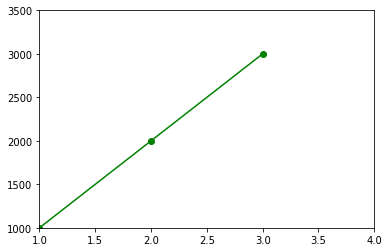

In [ ]:
import matplotlib.pyplot as plt 
plt.plot([1,2,3], [1000, 2000, 3000], '-go') # o "-" simboliza o grafico de linhas, o "o" simboliza as bolinhas e o "g" simboliza a cor (green)
plt.axis((1, 4, 1000, 3500)) # 1 e 4 referenciam os valores min e max do eixo x e 1000 e 3500 referenciam os valores min e max do eixo y
plt.show

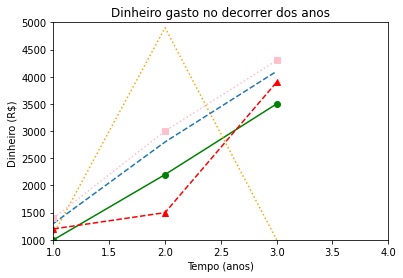

In [ ]:
plt.plot([1,2,3], [1000, 2200, 3500], '-go') #linha com bolinhas verdes 
plt.plot([1,2,3], [1100, 4900, 1000], ':', color='orange') #pontilhado laranja 
plt.plot([1,2,3], [1200, 1500, 3900], '--r^') #triângulo vermelho tracejado 
plt.plot([1,2,3], [1300, 2800, 4100], '--') #tracejado forte azul 
plt.plot([1,2,3], (1400, 3000, 4300), ':s', color="pink") #pontilhado com quadrados rosas
          
plt.axis ( (1, 4, 1000, 5000) )

plt.xlabel ("Tempo (anos)") 
plt. ylabel ("Dinheiro (R$) ") 
plt.title ("Dinheiro gasto no decorrer dos anos")

plt.show()

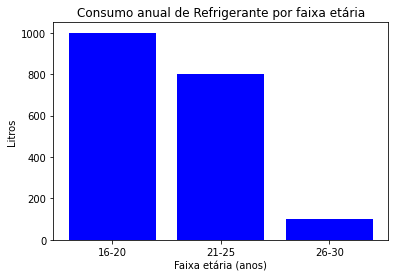

In [ ]:
faixaetaria = ["16-20", "21-25", "26-30"] 
consumo = [1000, 800, 100] 

plt.bar(faixaetaria, consumo, color='blue') 
plt.xlabel("Faixa etária (anos)") 
plt. ylabel ("Litros") 
plt.title("Consumo anual de Refrigerante por faixa etária") 

plt.show()

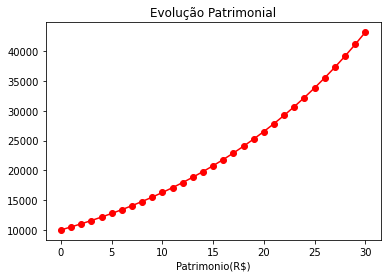

In [ ]:
capital = 10000
taxa = 0.05
tempo = 30

montante_anos = []
for ano in range(tempo + 1):
  montante_anos.append(juros_composto(capital, taxa, ano))

plt.plot( range(tempo + 1), montante_anos, '-ro')
plt.xlabel('Anos')
plt.xlabel('Patrimonio(R$)')
plt.title('Evolução Patrimonial')

plt.show()

# Aula KNN

In [ ]:
ponto_a = [0,0,1]
ponto_b = [1,1,3]

def distancia_euclidiana(ponto_a, ponto_b):
  if len(ponto_a) == len(ponto_b):
    d = 0
    for i in range(0, len(ponto_a)):
      d += (ponto_a[i] - ponto_b[i]) ** 2
    d = d ** 0.5  
    return d
  else:
    print('Impossível calcular a distancia euclediana de pontos com classificações diferente')


distancia_euclidiana(ponto_a, ponto_b)

2.449489742783178

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
amostras = []
with open('fertility_Diagnosis.txt', 'r') as dataset:
  for instancia in dataset.readlines():
    x = instancia.replace('\n', '').replace('N', '1').replace('O', '0').split(',')
    amostras.append([float(x[0]),
                     float(x[1]),      
                     float(x[2]),      
                     float(x[3]),      
                     float(x[4]),      
                     float(x[5]),      
                     float(x[6]),      
                     float(x[7]),      
                     float(x[8]),      
                     float(x[9])])


In [ ]:
def info_dataset(amostras, info=True):
  outputi, output2 = 0,0

  for amostra in amostras: 
    if amostra [-1] == 1:
      outputi += 1 #Paciente com fertilidade Normal 
    else:
      output2 += 1 #Paciente com fertilidade Alterada

  if info == True:
    print ('Total de amostras:', len (amostras)) 
    print ('Total Normal:', outputi) 
    print ('Total Alterado:', output2)

  return [len (amostras), outputi, output2]

In [ ]:
info_dataset(amostras)

Total de amostras: 100
Total Normal: 88
Total Alterado: 12


[100, 88, 12]

In [ ]:
porcentagem = 0.5 #porcentagem para treinamento
_, output1, output2 = info_dataset(amostras, info=False)

treinamento = [] 
teste = []

max_output1 = int( porcentagem*output1 ) 
max_output2 = int( porcentagem*output2 )

total_output1 = 0 
total_output2 = 0

for amostra in amostras: 
  if (total_output1 + total_output2) < (max_output1 + max_output2):
    #ainda é possível inserir números nno treinamento 
    treinamento.append (amostra) 
    if amostra[-1] == 1 and total_output1 < max_output1:
        total_output1 += 1 
    else:
        total_output2 += 1 
  else:
    #senao, o conjunto de treinamento ja foi preenchido 
    teste.append (amostra)

In [ ]:
dicionario = {0 : 0.9, 
              1: 0.8, 
              2: 0.7, 
              3: 0.6, 
              4: 0.24, 
              5: 0.4, 
              6: 0.3, 
              7: 0.25, 
              8: 0.23, 
              9: 0.22, 
              10: 0.21,}
              
lista = sorted(dicionario, key=dicionario.get)[:4] 

lista

[10, 9, 8, 4]

In [ ]:
def knn (treinamento, nova_amostra, k):

  distancias = {} 
  tamanho_treino = len(treinamento)

  #calcula a distância euclidiana da nova amostra para todos os outros exemplos do conjunto 
  for i in range (tamanho_treino):
     d = distancia_euclidiana(treinamento[i], nova_amostra) 
     distancias[i] = d

  #obtém as chaves (índices) dos k-vizinhos mais próximos 
  k_vizinhos = sorted(distancias, key=distancias.get) [:k] #retorna do começo até o k-ésimo elemento

  #votação maoritária 

  qtd_output1 = 0 
  qtd_output2 = 0 
  for indice in k_vizinhos: 
    if treinamento[indice] [-1] == 1: #se a saída for da classe 1 (Normal)
      qtd_output1 += 1 
    else:
      qtd_output2 += 1

  #senão se a saída for da classe 0 (Alterado) 
  if qtd_output1 > qtd_output2:
    return 1 
  else:
    return 0

In [ ]:
acertos = 0 
k=9

for amostra in teste:
  classe = knn(treinamento, amostra, k) 

  if amostra[-1] == classe:
    acertos += 1 

print("Total de treinamento ", len (treinamento)) 
print("Total de testes ", len (teste))
print("Total de acertos", acertos) 
print("Porcentagem de acerto ", 100*acertos/len (teste)) 

Total de treinamento  50
Total de testes  50
Total de acertos 47
Porcentagem de acerto  94.0
